# Task 1 
# I201861 Shaheer Abdullah

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
def read_dataset(data_dir):
    data = []
    labels = []

    for image_file in os.listdir(data_dir):

        image_path = os.path.join(data_dir, image_file)
        image = plt.imread(image_path)
        data.append(image.flatten())
        label = int(image_file.split('.')[0].replace('subject',''))-1
        labels.append(label)
    
    return np.array(data), np.array(labels)


In [3]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

def split_data(data, labels, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test


In [20]:
import numpy as np

class MLPClassifier:
    def __init__(self, input_size, hidden_layers, neurons_per_layer, output_size, learning_rate):
        self.layers = [input_size] + neurons_per_layer + [output_size]
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) for i in range(len(self.layers) - 1)]
        self.biases = [np.zeros((1, size)) for size in self.layers[1:]]
        
        self.activation_function = self.sigmoid
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        activations = [X]
        for i in range(len(self.layers) - 1):
            weighted_sum = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activation = self.activation_function(weighted_sum)
            activations.append(activation)
        return activations

    def backward(self, X, y, activations):
        deltas = [None] * (len(self.layers) - 1)
        deltas[-1] = (activations[-1] - y) * self.sigmoid_derivative(activations[-1])
        for i in reversed(range(len(deltas) - 1)):
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * self.sigmoid_derivative(activations[i+1])

        gradients_weights = [np.dot(activations[i].T.reshape((activations[i].T.shape[0],1)), deltas[i]) for i in range(len(deltas))]
        gradients_biases = [np.sum(deltas[i], axis=0) for i in range(len(deltas))]

        return gradients_weights, gradients_biases

    def train(self, X_train, y_train, epochs):
        for e in range(epochs):
            print(f'Epoch-{e+1}')
            for i in range(len(X_train)):
                X = X_train[i]
                y = np.zeros((1, self.layers[-1]))
                y[0, y_train[i]] = 1

                activations = self.forward(X)
                gradients_weights, gradients_biases = self.backward(X, y, activations)

                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * gradients_weights[j]
                    self.biases[j] -= self.learning_rate * gradients_biases[j]


In [7]:
data, labels = read_dataset('./Task1_Data')

In [8]:
X_train, X_test, y_train, y_test = split_data(data, labels, test_size=0.2)


In [31]:
input_size = X_train.shape[1]  # Adjust this based on your image dimensions
hidden_layers = [256, 128, 64]  # Customize the hidden layer architecture
neurons_per_layer = [256, 128, 64]  # Number of neurons in each hidden layer
output_size = len(np.unique(labels))  # Number of classes
learning_rate = 0.1
epochs = 10  # Choose the number of training epochs

# Define the MLP model
model = MLPClassifier(hidden_layer_sizes=(150, 150), activation='relu', solver='adam', max_iter=1000)

# Initialize empty lists to store history
train_accuracy_history = []
loss_history = []

for epoch in range(epochs):
    # Fit the model for one epoch
    model.fit(X_train, y_train)
    
    # Calculate training accuracy for this epoch (you may need to modify this depending on your data)
    train_accuracy = model.score(X_train, y_train)
    
    # Calculate loss (you may need to modify this depending on your data)
    loss = model.loss_
    
    # Append the metrics to history
    train_accuracy_history.append(train_accuracy)
    loss_history.append(loss)
    
    # Print progress
    print(f"Epoch {epoch+1}/{epochs} - Train Accuracy: {train_accuracy}, Loss: {loss}")

# Now, train_accuracy_history and loss_history contain the history of training accuracy and loss for each epoch


Epoch 1/10 - Train Accuracy: 1.0, Loss: 0.00025141448410773945
Epoch 2/10 - Train Accuracy: 1.0, Loss: 0.00025671039240922203
Epoch 3/10 - Train Accuracy: 0.9924242424242424, Loss: 0.27332505589846834
Epoch 4/10 - Train Accuracy: 1.0, Loss: 0.00023177819627622122
Epoch 5/10 - Train Accuracy: 1.0, Loss: 0.08227763783068959
Epoch 6/10 - Train Accuracy: 1.0, Loss: 0.0003169783481846947
Epoch 7/10 - Train Accuracy: 1.0, Loss: 0.00024806223653639953
Epoch 8/10 - Train Accuracy: 1.0, Loss: 0.00025526429788017176
Epoch 9/10 - Train Accuracy: 1.0, Loss: 0.0002546542866030972
Epoch 10/10 - Train Accuracy: 0.9924242424242424, Loss: 0.00023188394095758597


In [32]:
model.score(X_test,y_test)

0.8484848484848485

In [41]:
epocs_dict = {
    '1': 1.0,
    '2': 1.0,
    '3': 0.9924242424242424,
    '4': 1.0,
    '5': 1.0,
    '6': 1.0,
    '7': 1.0,
    '8': 1.0,
    '9': 1.0,
    '10': 0.9924242424242424
}

<Figure size 800x1600 with 0 Axes>

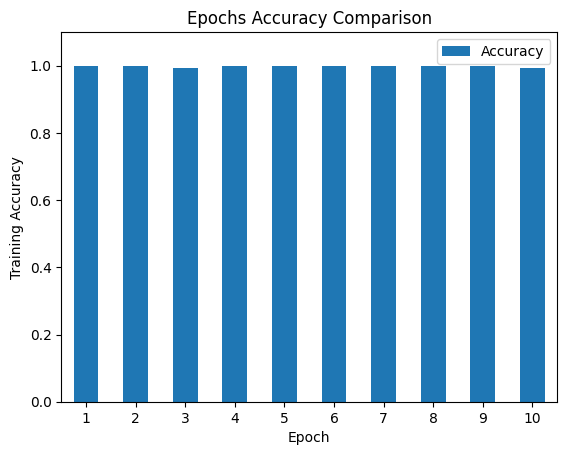

In [42]:
model_compare = pd.DataFrame(epocs_dict , index=["Accuracy"])
# Create a bar plot
plt.figure(figsize=(8, 16))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Epochs Accuracy Comparison')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.xlabel('Epoch')  # Add label to the x-axis
plt.ylabel('Training Accuracy') 
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.85
Precision: 0.85
Recall: 0.86
F1 Score: 0.83


<Figure size 400x300 with 0 Axes>

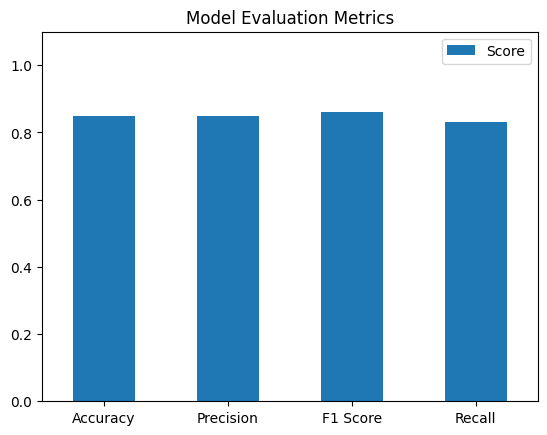

In [48]:
Metrics_dict={
              "Accuracy": 0.85,
              "Precision": 0.85,
              "F1 Score": 0.86,
              "Recall": 0.83 
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4, 3))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()